# Building a Simple Neural Network

In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

from data import iris
import pandas as pd

In [15]:
data = pd.read_csv('data/iris.data.txt', sep=",", header=None)
data.columns = ['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm', 'class']

In [20]:
data.drop(0)
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [21]:
#Create the module
class IrisNet(nn.Module):
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden2_size, num_classes)
        
    def forward(self,x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

In [22]:
#Print the module
model = IrisNet(4,100,50,3)
print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)


## Create DataLoader

In [23]:
batch_size = 60
iris_data = 'data/iris.data.txt'

In [24]:
#get the datasets
train_ds, test_ds = iris.get_datasets(iris_data)

In [25]:
#Print number of instances
print('# instances in training set: ', len(train_ds))
print('# instances in test set: ', len(test_ds))

# instances in training set:  120
# instances in test set:  30


In [27]:
#Create dataloaders
train_loader = torch.utils.data.DataLoader(dataset=train_ds, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_ds, batch_size=batch_size, shuffle=True)

## Instantiate Network, Loss Function and Optimizer

In [30]:
#Model
net = IrisNet(4,100,50,3)

#Loss Function
criterion = nn.CrossEntropyLoss()

#Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

## Training

In [52]:
num_epochs = 500
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(num_epochs):
    
    train_correct = 0
    train_total = 0
    
    for i, (items,classes) in enumerate(train_loader):
        
        #Convert torch tensor to Variable
        classes = classes.long()
        items = Variable(items)
        classes = Variable(classes)
        
        #Put network in training mode
        net.train()
        
        #clear off gradients from past operations
        optimizer.zero_grad()
        
        #Do forward pass
        outputs=net(items)
        
        #Calculate loss
        loss = criterion(outputs, classes)
        
        #back propagation to calculate gradients
        loss.backward()
        
        #adjust optimizer
        optimizer.step()
        
        #Record correct predictions
        train_total += classes.size(0)
        _, predicted = torch.max(outputs.data, 1)
        train_correct += (predicted == classes.data).sum()
        
        print('Epoch %d/%d, Iteration %d/%d, Loss: %.4f' % (epoch+1, num_epochs, i+1, len(train_ds)//batch_size, loss.item()))
        
    #put network in evaluation mode
    net.eval()
    
    #Record training loss
    train_loss.append(loss.item())
    
    #Record training accuracy
    train_accuracy.append((100 * train_correct /train_total))
    
    #Record test loss
    test_items = torch.FloatTensor(test_ds.data.values[:, 0:4])
    test_classes = torch.LongTensor(test_ds.data.values[:, 4])
    outputs = net(Variable(test_items))
    loss = criterion(outputs, Variable(test_classes))
    test_loss.append(loss.item())
    
    #Record test accuracy
    _, predicted = torch.max(outputs.data, 1)
    total = test_classes.size(0)
    correct = (predicted == test_classes).sum()
    test_accuracy.append((100 * correct / total))

Epoch 1/500, Iteration 1/2, Loss: 1.0694
Epoch 1/500, Iteration 2/2, Loss: 1.0105
Epoch 2/500, Iteration 1/2, Loss: 1.0251
Epoch 2/500, Iteration 2/2, Loss: 1.0069
Epoch 3/500, Iteration 1/2, Loss: 1.0078
Epoch 3/500, Iteration 2/2, Loss: 0.9866
Epoch 4/500, Iteration 1/2, Loss: 1.0012
Epoch 4/500, Iteration 2/2, Loss: 0.9659
Epoch 5/500, Iteration 1/2, Loss: 0.9734
Epoch 5/500, Iteration 2/2, Loss: 0.9680
Epoch 6/500, Iteration 1/2, Loss: 0.9768
Epoch 6/500, Iteration 2/2, Loss: 0.9428
Epoch 7/500, Iteration 1/2, Loss: 0.9703
Epoch 7/500, Iteration 2/2, Loss: 0.9280
Epoch 8/500, Iteration 1/2, Loss: 0.9695
Epoch 8/500, Iteration 2/2, Loss: 0.9071
Epoch 9/500, Iteration 1/2, Loss: 0.9406
Epoch 9/500, Iteration 2/2, Loss: 0.9113
Epoch 10/500, Iteration 1/2, Loss: 0.9026
Epoch 10/500, Iteration 2/2, Loss: 0.9240
Epoch 11/500, Iteration 1/2, Loss: 0.9016
Epoch 11/500, Iteration 2/2, Loss: 0.8992
Epoch 12/500, Iteration 1/2, Loss: 0.8966
Epoch 12/500, Iteration 2/2, Loss: 0.8792
Epoch 13/5

Epoch 98/500, Iteration 2/2, Loss: 0.3642
Epoch 99/500, Iteration 1/2, Loss: 0.3299
Epoch 99/500, Iteration 2/2, Loss: 0.3741
Epoch 100/500, Iteration 1/2, Loss: 0.3614
Epoch 100/500, Iteration 2/2, Loss: 0.3386
Epoch 101/500, Iteration 1/2, Loss: 0.3547
Epoch 101/500, Iteration 2/2, Loss: 0.3407
Epoch 102/500, Iteration 1/2, Loss: 0.3565
Epoch 102/500, Iteration 2/2, Loss: 0.3339
Epoch 103/500, Iteration 1/2, Loss: 0.3403
Epoch 103/500, Iteration 2/2, Loss: 0.3455
Epoch 104/500, Iteration 1/2, Loss: 0.3776
Epoch 104/500, Iteration 2/2, Loss: 0.3037
Epoch 105/500, Iteration 1/2, Loss: 0.3375
Epoch 105/500, Iteration 2/2, Loss: 0.3394
Epoch 106/500, Iteration 1/2, Loss: 0.3462
Epoch 106/500, Iteration 2/2, Loss: 0.3275
Epoch 107/500, Iteration 1/2, Loss: 0.3187
Epoch 107/500, Iteration 2/2, Loss: 0.3498
Epoch 108/500, Iteration 1/2, Loss: 0.3825
Epoch 108/500, Iteration 2/2, Loss: 0.2815
Epoch 109/500, Iteration 1/2, Loss: 0.3317
Epoch 109/500, Iteration 2/2, Loss: 0.3278
Epoch 110/500,

Epoch 193/500, Iteration 2/2, Loss: 0.2059
Epoch 194/500, Iteration 1/2, Loss: 0.1877
Epoch 194/500, Iteration 2/2, Loss: 0.2092
Epoch 195/500, Iteration 1/2, Loss: 0.2465
Epoch 195/500, Iteration 2/2, Loss: 0.1431
Epoch 196/500, Iteration 1/2, Loss: 0.1895
Epoch 196/500, Iteration 2/2, Loss: 0.1981
Epoch 197/500, Iteration 1/2, Loss: 0.2157
Epoch 197/500, Iteration 2/2, Loss: 0.1697
Epoch 198/500, Iteration 1/2, Loss: 0.1647
Epoch 198/500, Iteration 2/2, Loss: 0.2191
Epoch 199/500, Iteration 1/2, Loss: 0.1720
Epoch 199/500, Iteration 2/2, Loss: 0.2093
Epoch 200/500, Iteration 1/2, Loss: 0.1750
Epoch 200/500, Iteration 2/2, Loss: 0.2042
Epoch 201/500, Iteration 1/2, Loss: 0.1759
Epoch 201/500, Iteration 2/2, Loss: 0.2020
Epoch 202/500, Iteration 1/2, Loss: 0.1547
Epoch 202/500, Iteration 2/2, Loss: 0.2212
Epoch 203/500, Iteration 1/2, Loss: 0.1854
Epoch 203/500, Iteration 2/2, Loss: 0.1891
Epoch 204/500, Iteration 1/2, Loss: 0.1707
Epoch 204/500, Iteration 2/2, Loss: 0.2092
Epoch 205/5

Epoch 288/500, Iteration 2/2, Loss: 0.1398
Epoch 289/500, Iteration 1/2, Loss: 0.1498
Epoch 289/500, Iteration 2/2, Loss: 0.1118
Epoch 290/500, Iteration 1/2, Loss: 0.1507
Epoch 290/500, Iteration 2/2, Loss: 0.1112
Epoch 291/500, Iteration 1/2, Loss: 0.1298
Epoch 291/500, Iteration 2/2, Loss: 0.1300
Epoch 292/500, Iteration 1/2, Loss: 0.1292
Epoch 292/500, Iteration 2/2, Loss: 0.1299
Epoch 293/500, Iteration 1/2, Loss: 0.1107
Epoch 293/500, Iteration 2/2, Loss: 0.1474
Epoch 294/500, Iteration 1/2, Loss: 0.1142
Epoch 294/500, Iteration 2/2, Loss: 0.1434
Epoch 295/500, Iteration 1/2, Loss: 0.1276
Epoch 295/500, Iteration 2/2, Loss: 0.1286
Epoch 296/500, Iteration 1/2, Loss: 0.1571
Epoch 296/500, Iteration 2/2, Loss: 0.0987
Epoch 297/500, Iteration 1/2, Loss: 0.1415
Epoch 297/500, Iteration 2/2, Loss: 0.1137
Epoch 298/500, Iteration 1/2, Loss: 0.1387
Epoch 298/500, Iteration 2/2, Loss: 0.1169
Epoch 299/500, Iteration 1/2, Loss: 0.1185
Epoch 299/500, Iteration 2/2, Loss: 0.1347
Epoch 300/5

Epoch 383/500, Iteration 2/2, Loss: 0.1120
Epoch 384/500, Iteration 1/2, Loss: 0.1053
Epoch 384/500, Iteration 2/2, Loss: 0.1015
Epoch 385/500, Iteration 1/2, Loss: 0.0899
Epoch 385/500, Iteration 2/2, Loss: 0.1152
Epoch 386/500, Iteration 1/2, Loss: 0.1049
Epoch 386/500, Iteration 2/2, Loss: 0.1015
Epoch 387/500, Iteration 1/2, Loss: 0.1054
Epoch 387/500, Iteration 2/2, Loss: 0.0997
Epoch 388/500, Iteration 1/2, Loss: 0.1467
Epoch 388/500, Iteration 2/2, Loss: 0.0572
Epoch 389/500, Iteration 1/2, Loss: 0.1213
Epoch 389/500, Iteration 2/2, Loss: 0.0822
Epoch 390/500, Iteration 1/2, Loss: 0.1024
Epoch 390/500, Iteration 2/2, Loss: 0.1021
Epoch 391/500, Iteration 1/2, Loss: 0.0800
Epoch 391/500, Iteration 2/2, Loss: 0.1228
Epoch 392/500, Iteration 1/2, Loss: 0.0852
Epoch 392/500, Iteration 2/2, Loss: 0.1183
Epoch 393/500, Iteration 1/2, Loss: 0.0992
Epoch 393/500, Iteration 2/2, Loss: 0.1028
Epoch 394/500, Iteration 1/2, Loss: 0.0861
Epoch 394/500, Iteration 2/2, Loss: 0.1158
Epoch 395/5

Epoch 478/500, Iteration 2/2, Loss: 0.0881
Epoch 479/500, Iteration 1/2, Loss: 0.0932
Epoch 479/500, Iteration 2/2, Loss: 0.0836
Epoch 480/500, Iteration 1/2, Loss: 0.0947
Epoch 480/500, Iteration 2/2, Loss: 0.0848
Epoch 481/500, Iteration 1/2, Loss: 0.1208
Epoch 481/500, Iteration 2/2, Loss: 0.0556
Epoch 482/500, Iteration 1/2, Loss: 0.1066
Epoch 482/500, Iteration 2/2, Loss: 0.0720
Epoch 483/500, Iteration 1/2, Loss: 0.0918
Epoch 483/500, Iteration 2/2, Loss: 0.0848
Epoch 484/500, Iteration 1/2, Loss: 0.0752
Epoch 484/500, Iteration 2/2, Loss: 0.1010
Epoch 485/500, Iteration 1/2, Loss: 0.0725
Epoch 485/500, Iteration 2/2, Loss: 0.1061
Epoch 486/500, Iteration 1/2, Loss: 0.0776
Epoch 486/500, Iteration 2/2, Loss: 0.0980
Epoch 487/500, Iteration 1/2, Loss: 0.0974
Epoch 487/500, Iteration 2/2, Loss: 0.0780
Epoch 488/500, Iteration 1/2, Loss: 0.0868
Epoch 488/500, Iteration 2/2, Loss: 0.0883
Epoch 489/500, Iteration 1/2, Loss: 0.0606
Epoch 489/500, Iteration 2/2, Loss: 0.1163
Epoch 490/5

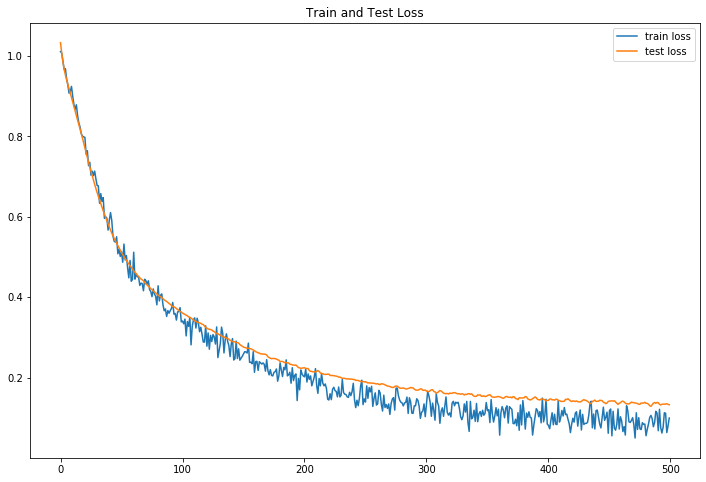

In [53]:
#Plot loss vs iterations
fig = plt.figure(figsize=(12,8))
plt.plot(train_loss, label = 'train loss')
plt.plot(test_loss, label = 'test loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()

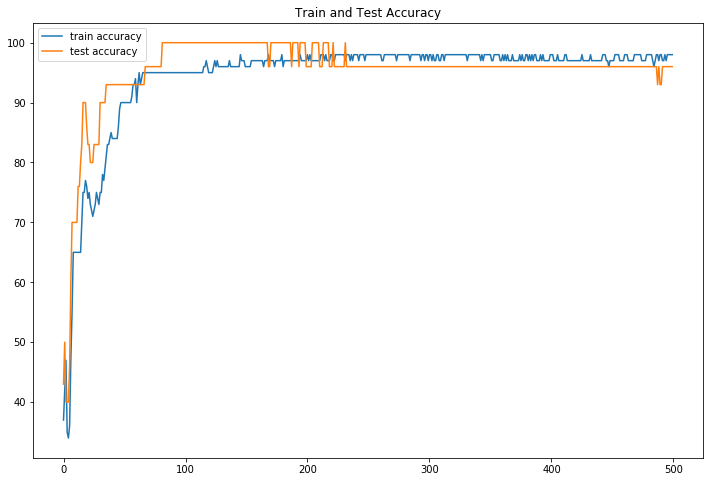

In [54]:
fig = plt.figure(figsize=(12,8))
plt.plot(train_accuracy, label = 'train accuracy')
plt.plot(test_accuracy, label = 'test accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

## Saving Model to Disk and Loading it Back

In [55]:
torch.save(net.state_dict(), './2.model.pth')

In [56]:
net2 = IrisNet(4,100,50,3)
net2.load_state_dict(torch.load('./2.model.pth'))
net2.eval()

IrisNet(
  (fc1): Linear(in_features=4, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [57]:
item = [[5.1, 3.5, 1.4, 0.2]]
expected_class = 0 #Iris-setosa

In [58]:
output = net2(Variable(torch.FloatTensor(item)))

In [60]:
_, predicted = torch.max(output.data, 1)
print('Predicted Class: ',  predicted.numpy()[0])
print('Expected Class: ', expected_class)

Predicted Class:  0
Expected Class:  0
